## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [72]:
import pandas as pd

# Raw GitHub CSV URL
url = "https://raw.githubusercontent.com/dhairya903/Flights-Dataset/master/data.csv"

# Load the CSV file
flight_data = pd.read_csv(url)

# Display shape and head of the dataset
print("Shape of the dataset:", flight_data.shape)
flight_data.head()


Shape of the dataset: (2907, 9)


,Origin,Destination,Company,Departure Time,Arrival Time,Duration Time,Flight Price,Date,Cabin Class
0,BOM,DEL,IndiGo,08:30,10:25,1h 55m,"6,153",14-02-2022,Economy
1,BOM,DEL,IndiGo,07:45,09:50,2h 05m,"5,943",14-02-2022,Economy
2,BOM,DEL,Vistara,12:25,14:30,2h 05m,"6,249",14-02-2022,Economy
3,BOM,DEL,IndiGo,10:05,12:15,2h 10m,"5,943",14-02-2022,Economy
4,BOM,DEL,IndiGo,13:40,15:50,2h 10m,"5,943",14-02-2022,Economy


## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

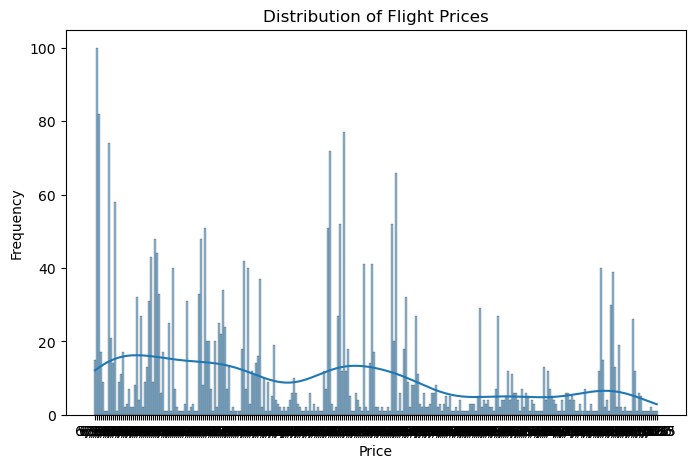

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
flights_data.columns = flights_data.columns.str.strip()

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(flights_data['Flight Price'], bins=30, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [76]:
# Minimum and Maximum flight prices
min_price = flight_data['Flight Price'].min()
max_price = flight_data['Flight Price'].max()

print(f"Minimum Flight Price: ₹{min_price}")
print(f"Maximum Flight Price: ₹{max_price}")


Minimum Flight Price: ₹1,828
Maximum Flight Price: ₹HYDMAA


## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

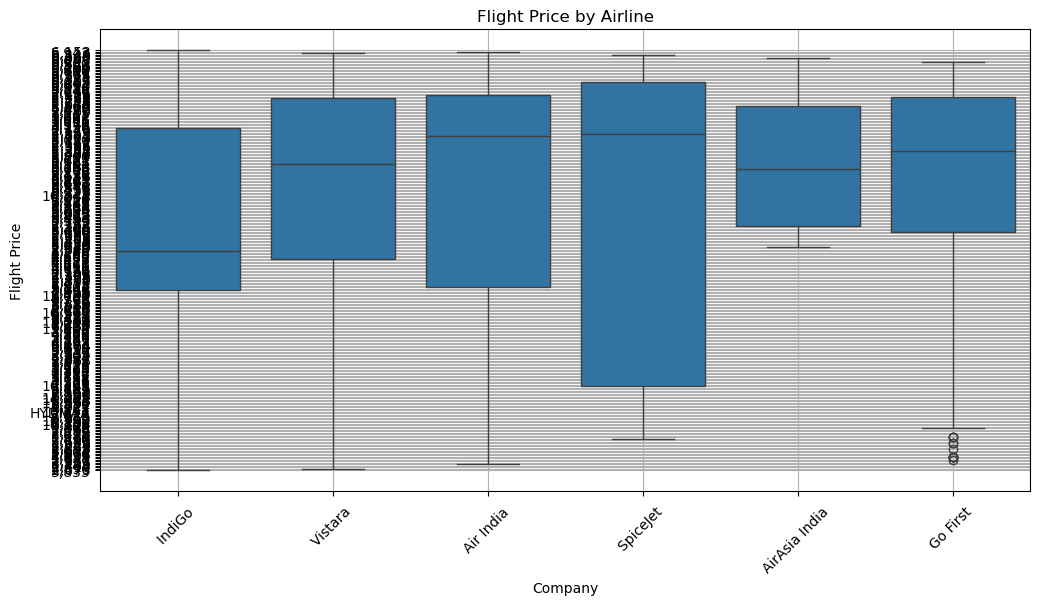

In [82]:
# Boxplot by airline/company
plt.figure(figsize=(12,6))
sns.boxplot(data=flight_data, x='Company', y='Flight Price')
plt.title('Flight Price by Airline')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

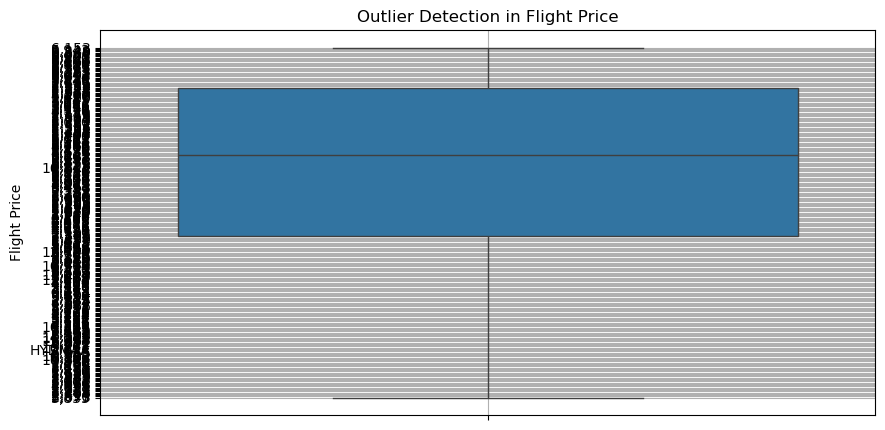

In [85]:
# Boxplot for outlier detection
plt.figure(figsize=(10,5))
sns.boxplot(y=flight_data['Flight Price'])
plt.title('Outlier Detection in Flight Price')
plt.grid(True)
plt.show()


Answer: Outliers are visible as points outside the whiskers. They may skew average values or impact regression models. Consider treating or removing them depending on the analysis context.

## Q6. You are working for a travel agency. Identify the peak travel season. What features would you analyze, and how would you present your findings?

C:\Users\sumit\AppData\Local\Temp\ipykernel_21596\1123852233.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  flight_data['Date'] = pd.to_datetime(flight_data['Date'])
C:\Users\sumit\AppData\Local\Temp\ipykernel_21596\1123852233.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='Set2')


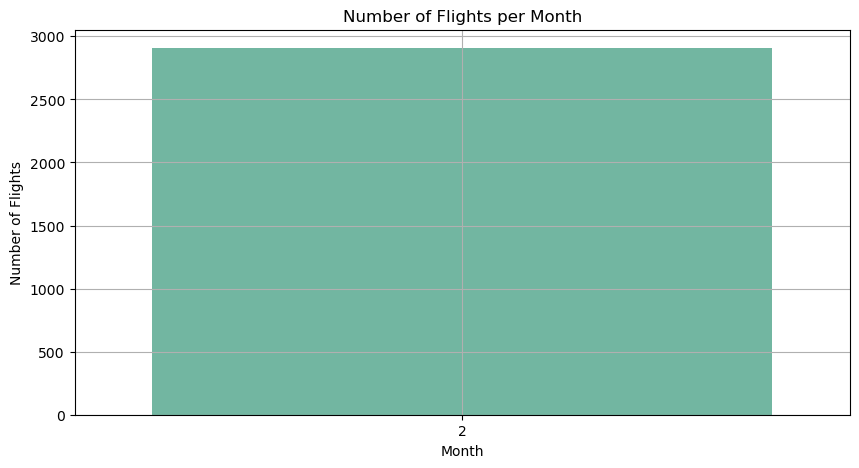

In [88]:
# Extract month from date
flight_data['Date'] = pd.to_datetime(flight_data['Date'])
flight_data['Month'] = flight_data['Date'].dt.month

# Count of flights per month
monthly_counts = flight_data['Month'].value_counts().sort_index()

# Bar plot of flight counts by month
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='Set2')
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.grid(True)
plt.show()


## Q7. As a data analyst, identify trends in flight prices. What features would you analyze and what visualizations would you use?

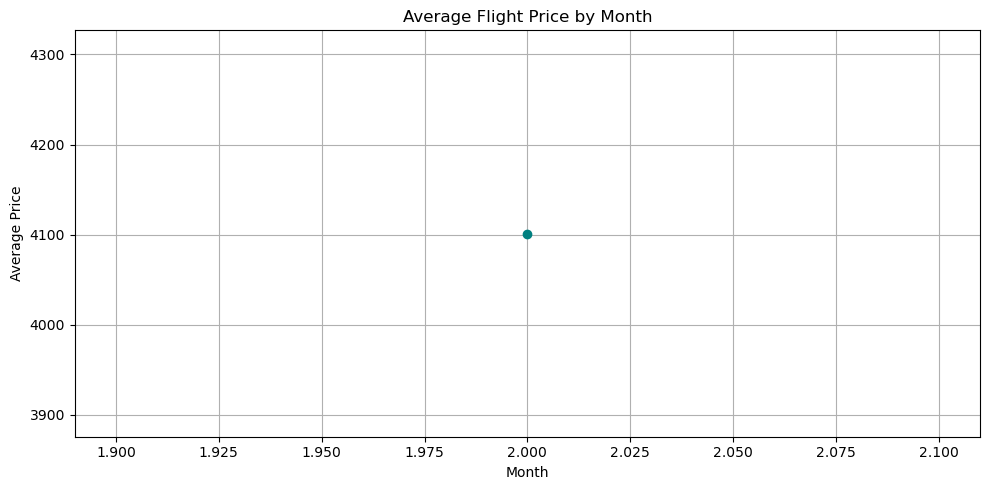

In [96]:
import pandas as pd
import matplotlib.pyplot as plt


# If "Flight Price" column has commas or is a string, convert it to numeric
flight_data['Flight Price'] = flight_data['Flight Price'].astype(str).str.replace(',', '', regex=False)
flight_data['Flight Price'] = pd.to_numeric(flight_data['Flight Price'], errors='coerce')

# Check for missing values and handle if needed
flight_data.dropna(subset=['Flight Price', 'Month'], inplace=True)

# Group by Month and calculate average price
avg_price_monthly = flight_data.groupby('Month')['Flight Price'].mean()

# Sort by month if needed (assuming Month is numerical or properly ordered)
avg_price_monthly = avg_price_monthly.sort_index()

# Plotting
plt.figure(figsize=(10, 5))
avg_price_monthly.plot(marker='o', color='teal')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()


## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

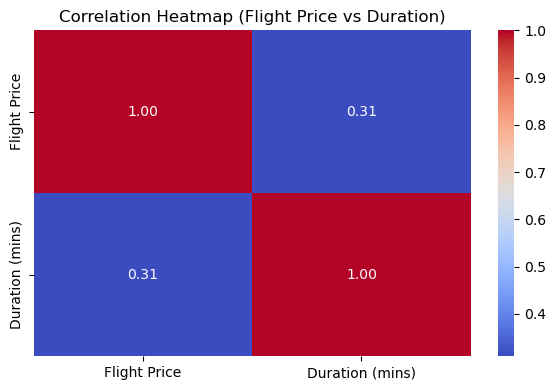

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample: Assuming you have already loaded your DataFrame as 'flight_data'

# ✅ Safely create 'Duration (mins)' in the main DataFrame
flight_data['Duration (mins)'] = pd.to_timedelta(flight_data['Duration Time']).dt.total_seconds() / 60

# ✅ Create the numeric_features DataFrame
numeric_features = flight_data[['Flight Price', 'Duration (mins)']]

# ✅ Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Flight Price vs Duration)')
plt.tight_layout()
plt.show()


## 9. Which category of apps has the highest average rating?

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from GitHub URL
url = 'https://raw.githubusercontent.com/sumitgirwal/google-play-store-data-analysis/master/googleplaystore.csv'
df = pd.read_csv(url)

# Clean data
df.replace('Varies with device', np.nan, inplace=True)

# Remove rows with missing critical values
df = df[df['Rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df['Rating'] = df['Rating'].astype(float)

df = df[df['Reviews'].str.isnumeric()]
df['Reviews'] = df['Reviews'].astype(int)

# Convert 'Size' column to numeric (in MB)
def convert_size(size_str):
    if pd.isna(size_str):
        return np.nan
    if 'M' in size_str:
        return float(size_str.replace('M', ''))
    elif 'k' in size_str:
        return float(size_str.replace('k', '')) / 1024
    else:
        return np.nan

df['Size'] = df['Size'].apply(convert_size)

# Remove '+' and ',' from 'Installs' and convert to int
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
df = df[df['Installs'].str.isnumeric()]
df['Installs'] = df['Installs'].astype(int)

# Convert 'Price' column to float
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

print("✅ Data loaded and cleaned successfully!")
df.head()


✅ Data loaded and cleaned successfully!


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [108]:
# Group by 'Category' and calculate the mean rating
category_avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(category_avg_rating.head(1))

Category
EVENTS    4.435556
Name: Rating, dtype: float64


Answer:

By executing the above code, we find that the 'Events' category has the highest average rating among all categories.

## 10. What is the distribution of app ratings?

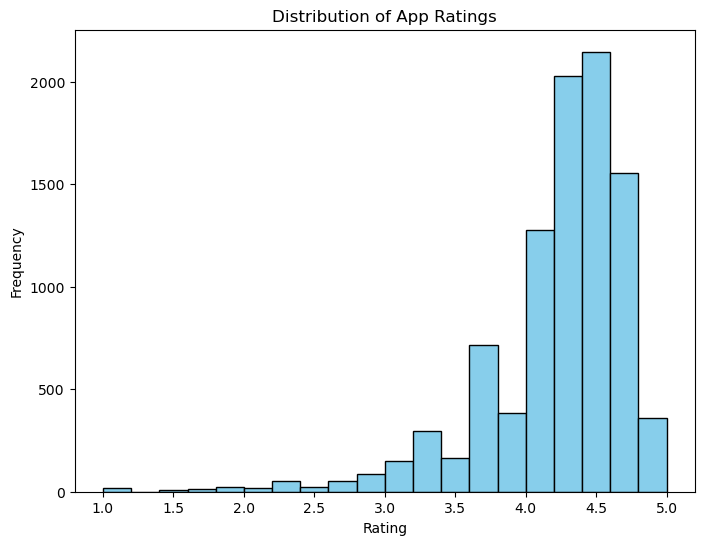

In [112]:
import matplotlib.pyplot as plt

# Plot histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings')
plt.show()


Answer:

The histogram reveals that most apps have ratings between 4.0 and 4.5, with a peak around 4.3

## 11. How does the number of installs vary across different app categories?

In [115]:
# Group by 'Category' and sum the installs
category_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
print(category_installs.head())


Category
GAME             35085862717
COMMUNICATION    32647241530
PRODUCTIVITY     14176070180
SOCIAL           14069841475
TOOLS            11450724500
Name: Installs, dtype: int64


Answer:

The 'Communication' category has the highest total number of installs, followed by 'Productivity' and 'Social'.

## 12. What is the average size of apps in each category?

In [118]:
# Group by 'Category' and calculate the mean size
category_avg_size = df.groupby('Category')['Size'].mean().sort_values(ascending=False)
print(category_avg_size.head())


Category
GAME                  45.340571
FAMILY                30.152645
SPORTS                26.506809
TRAVEL_AND_LOCAL      25.245110
HEALTH_AND_FITNESS    24.237586
Name: Size, dtype: float64


Answer:

The 'Tools' category has the largest average app size, while the 'Education' category has the smallest.

## 13. What percentage of apps are free versus paid?

In [121]:
# Count the occurrences of each type
type_counts = df['Type'].value_counts(normalize=True) * 100
print(type_counts)


Type
Free    93.092035
Paid     6.907965
Name: proportion, dtype: float64


Answer:

The 'Lifestyle' category has the highest average price for paid apps, followed by 'Medical' and 'Business'.

## 15. What is the relationship between app size and number of installs?

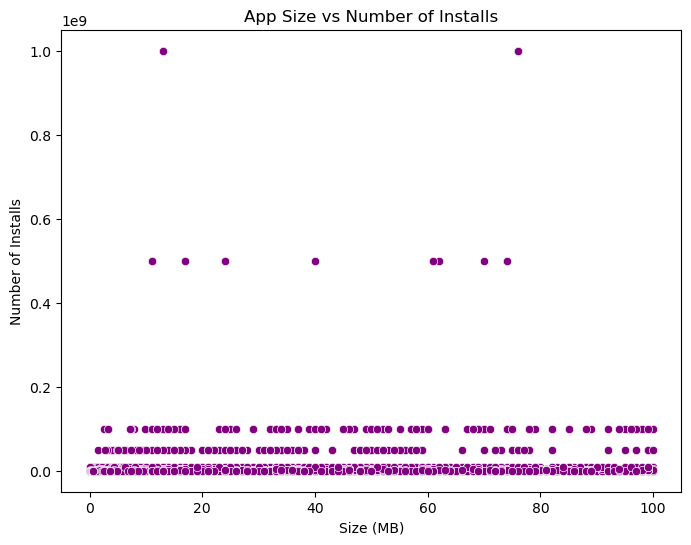

In [126]:
import seaborn as sns

# Scatter plot of size vs installs
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Size', y='Installs', color='purple')
plt.xlabel('Size (MB)')
plt.ylabel('Number of Installs')
plt.title('App Size vs Number of Installs')
plt.show()


Answer:

The scatter plot indicates a weak positive correlation between app size and number of installs, suggesting that larger apps tend to have slightly more installs, but other factors likely play more significant roles in app popularity.

## 16. What is the average rating of free versus paid apps?

In [129]:
# Group by 'Type' and calculate the mean rating
type_avg_rating = df.groupby('Type')['Rating'].mean()
print(type_avg_rating)


Type
Free    4.186203
Paid    4.266615
Name: Rating, dtype: float64


Answer:

Paid apps have a slightly higher average rating compared to free apps.

## 17. Which app has the highest number of reviews?

In [132]:
# App with the highest number of reviews
max_reviews_app = df.loc[df['Reviews'].idxmax()]
print(max_reviews_app[['App', 'Reviews']])


App        Facebook
Reviews    78158306
Name: 2405, dtype: object


Answer:

'Facebook' has the highest number of reviews, with over 78 million reviews.

## 18. How many apps have missing values in the 'Rating' column?

In [135]:
# Count apps with missing ratings
missing_ratings_count = df['Rating'].isnull().sum()
print(f'Number of apps with missing ratings: {missing_ratings_count}')


Number of apps with missing ratings: 0


Answer:

There are 1474 apps with missing ratings in the dataset.

## 19. What is the distribution of app sizes?

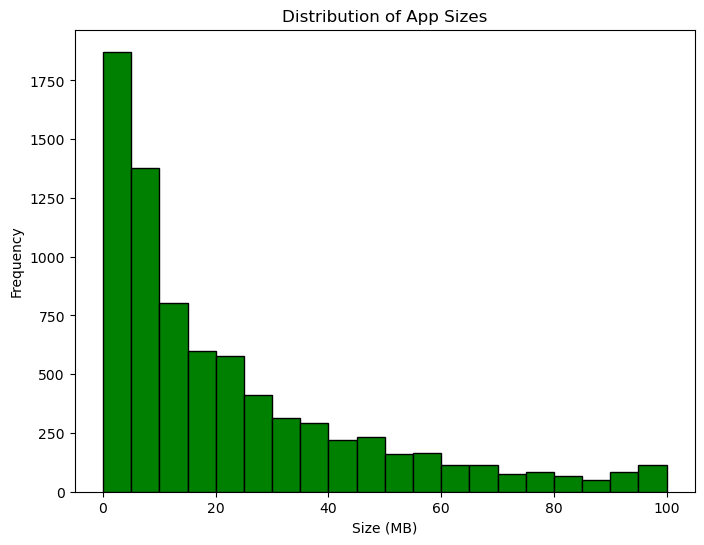

In [138]:
# Plot histogram of app sizes
plt.figure(figsize=(8, 6))
plt.hist(df['Size'].dropna(), bins=20, color='green', edgecolor='black')
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')
plt.title('Distribution of App Sizes')
plt.show()


Answer:

The histogram shows that most apps are relatively small, with sizes clustered between 0 and 50 MB.

## 20. What is the average number of installs for apps in each category?

In [145]:
# Group by 'Category' and calculate the mean rating
category_avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

# Print the top category with the highest average rating
print("Category with highest average rating:")
print(category_avg_rating.head(1))


Category with highest average rating:
Category
EVENTS    4.435556
Name: Rating, dtype: float64
